# Overview
This jupyter notebook covers the following contents:
1. Default configuration in LIBERO
2. Basic information about available LIBERO benchmarks
   - Get a dictionary of mapping from benchmark name to benchmark class
   - Check the integrity of benchmarks
   - Check the integrity of init files
   - Visualize all the init states of a task
   - Download datasets
   - Get information about a demonstration file and replay a trajectory


In [1]:
from libero.libero import benchmark, get_libero_path, set_libero_default_path
import os
from termcolor import colored

/ubc/cs/research/ubc_ml/gguz/miniconda3/envs/octo-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Default file paths

All the paths are retrieved from a yaml config file located at `~/.libero/config.yaml`. And the default paths are set to relative to the libero codebase.

In [2]:
benchmark_root_path = get_libero_path("benchmark_root")
init_states_default_path = get_libero_path("init_states")
datasets_default_path = get_libero_path("datasets")
bddl_files_default_path = get_libero_path("bddl_files")

print("Default benchmark root path: ", benchmark_root_path)
print("Default dataset root path: ", datasets_default_path)
print("Default bddl files root path: ", bddl_files_default_path)

Default benchmark root path:  /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero
Default dataset root path:  /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/../datasets
Default bddl files root path:  /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/./bddl_files


Now if you want to point your codebase to custom path, you can use `set_libero_path` function to do that. Notice that all the paths change according to `benchmark_root` value.

# 2. See available benchmarks

### 2.1 Get a dictionary of mapping from benchmark name to benchmark class

In [3]:
benchmark_dict = benchmark.get_benchmark_dict()
print(benchmark_dict.keys())

dict_keys(['libero_spatial', 'libero_object', 'libero_goal', 'libero_90', 'libero_10', 'libero_100', 'libero_high_level', 'libero_low_level', 'libero_conj'])


### 2.2 Check the integrity of benchmarks

In [4]:
# initialize a benchmark
benchmark_instance = benchmark_dict["libero_low_level"]()
num_tasks = benchmark_instance.get_num_tasks()
# see how many tasks involved in the benchmark
print(f"{num_tasks} tasks in the benchmark {benchmark_instance.name}: ")

# Check if all the task names and their bddl file names
task_names = benchmark_instance.get_task_names()
print("The benchmark contains the following tasks:")
for i in range(num_tasks):
    task_name = task_names[i]
    task = benchmark_instance.get_task(i)
    bddl_file = os.path.join(bddl_files_default_path, task.problem_folder, task.bddl_file)
    print(f"\t {task_name}, detail definition stored in {bddl_file}")
    if not os.path.exists(bddl_file):
        print(colored(f"[error] bddl file {bddl_file} cannot be found. Check your paths", "red"))

13 tasks in the benchmark libero_low_level: 
The benchmark contains the following tasks:
	 KITCHEN_SCENE3_turn_on_the_stove, detail definition stored in /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/./bddl_files/libero_low_level/KITCHEN_SCENE3_turn_on_the_stove.bddl
	 KITCHEN_SCENE3_put_the_frying_pan_on_the_stove, detail definition stored in /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/./bddl_files/libero_low_level/KITCHEN_SCENE3_put_the_frying_pan_on_the_stove.bddl
	 KITCHEN_SCENE3_put_the_moka_pot_on_the_stove, detail definition stored in /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/./bddl_files/libero_low_level/KITCHEN_SCENE3_put_the_moka_pot_on_the_stove.bddl
	 LIVING_ROOM_SCENE2_pick_up_the_alphabet_soup_and_put_it_in_the_basket, detail definition stored in /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/./bddl_files/libero_low_level/LIVING_ROOM_SCENE2_pick_up_the_alphabet_soup_and_put_it_in_the_basket.bddl
	 LIVING_ROOM_SCENE2_

### 2.3 Check the integrity of init files

In [5]:
# Check if all the init states files exist for tasks
task_names = benchmark_instance.get_task_names()
print("The benchmark contains the following tasks:")
for i in range(num_tasks):
    task_name = task_names[i]
    print(task_name)
    task = benchmark_instance.get_task(i)
    init_states_path = os.path.join(init_states_default_path, task.problem_folder, task.init_states_file)
    if not os.path.exists(init_states_path):
        print(colored(f"[error] the init states {init_states_path} cannot be found. Check your paths", "red"))
print(f"An example of init file is named like this: {task.init_states_file}")

# Load torch init files
init_states = benchmark_instance.get_task_init_states(0)
# Init states in the same (num_init_rollouts, num_simulation_states)
print(init_states.shape)


The benchmark contains the following tasks:
KITCHEN_SCENE3_turn_on_the_stove
KITCHEN_SCENE3_put_the_frying_pan_on_the_stove
KITCHEN_SCENE3_put_the_moka_pot_on_the_stove
LIVING_ROOM_SCENE2_pick_up_the_alphabet_soup_and_put_it_in_the_basket
LIVING_ROOM_SCENE2_pick_up_the_tomato_sauce_and_put_it_in_the_basket
LIVING_ROOM_SCENE2_pick_up_the_butter_and_put_it_in_the_basket
LIVING_ROOM_SCENE2_pick_up_the_cream_cheese_box_and_put_it_in_the_basket
LIVING_ROOM_SCENE1_pick_up_the_alphabet_soup_and_put_it_in_the_basket
LIVING_ROOM_SCENE1_pick_up_the_cream_cheese_box_and_put_it_in_the_basket
KITCHEN_SCENE8_put_the_right_moka_pot_on_the_stove
KITCHEN_SCENE8_put_the_left_moka_pot_on_the_stove
KITCHEN_SCENE6_close_the_microwave
KITCHEN_SCENE6_put_the_yellow_and_white_mug_in_the_microwave
An example of init file is named like this: KITCHEN_SCENE6_put_the_yellow_and_white_mug_in_the_microwave.pruned_init
(50, 47)


### 2.4 Visualize all the init states of a task

[robosuite WARNING] No private macro file found! (__init__.py:7)
[robosuite WARNING] It is recommended to use a private macro file (__init__.py:8)
[robosuite WARNING] To setup, run: python /ubc/cs/research/ubc_ml/gguz/miniconda3/envs/octo-env/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (__init__.py:9)


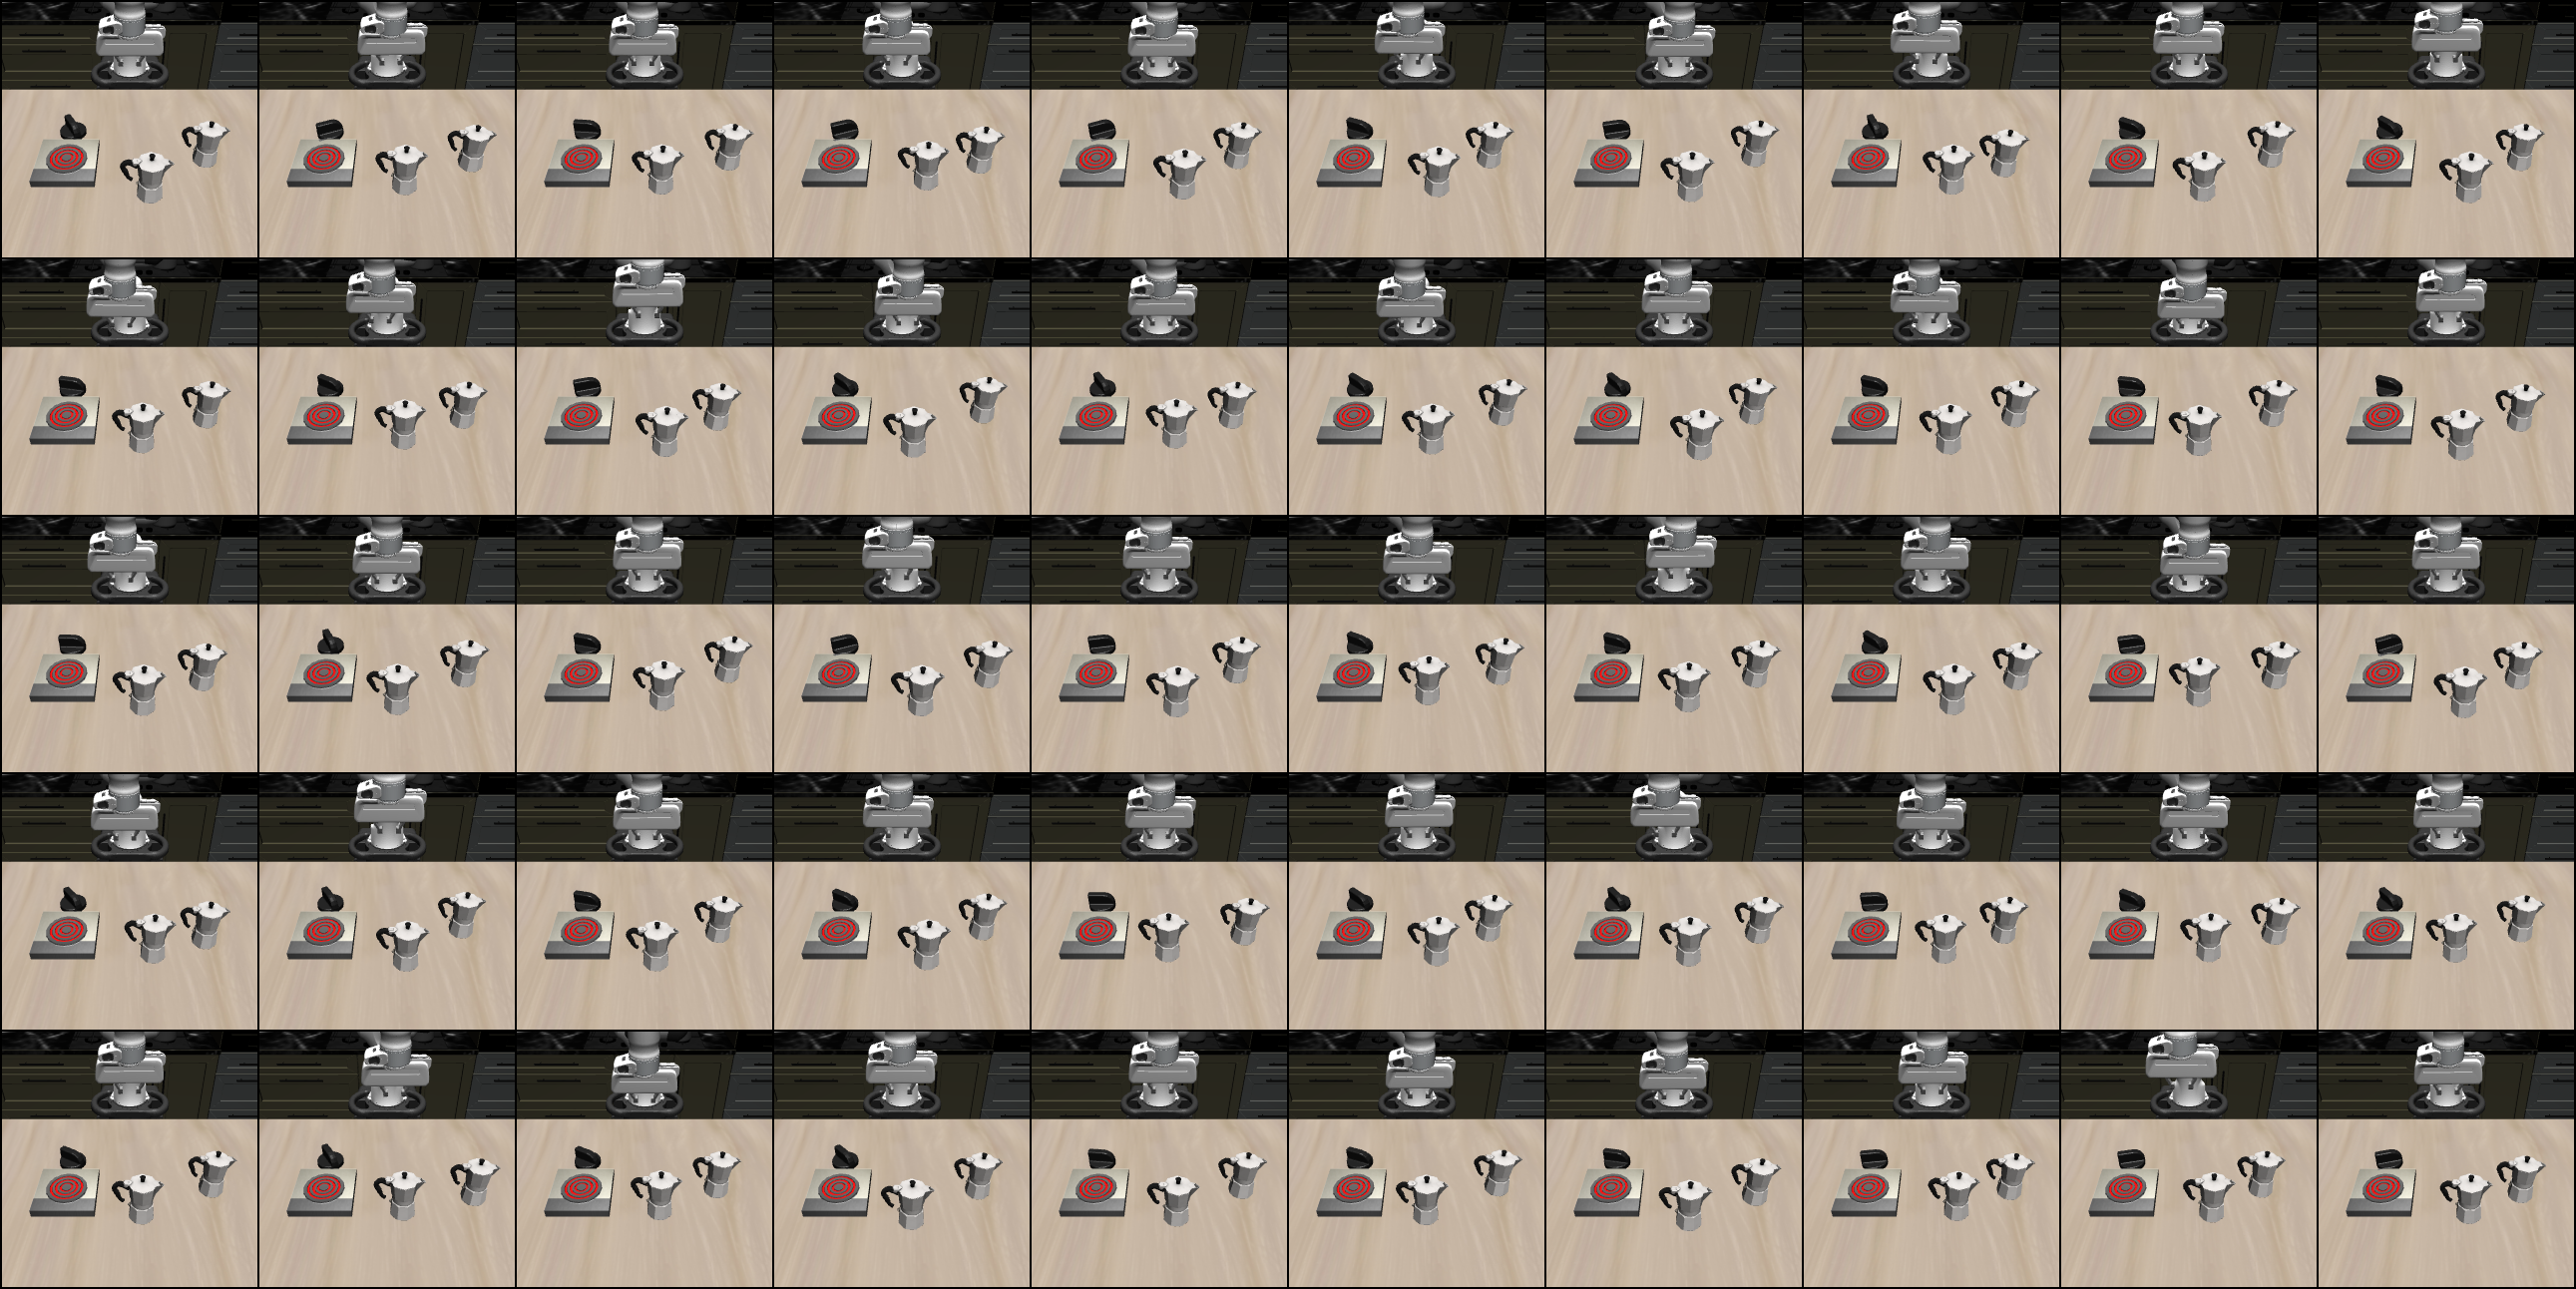

In [6]:
from libero.libero.envs import OffScreenRenderEnv
from IPython.display import display
from PIL import Image

import torch
import torchvision

# task_id is the (task_id + 1)th task in the benchmark
task_id = 9
task = benchmark_instance.get_task(task_id)

env_args = {
    "bddl_file_name": os.path.join(bddl_files_default_path, task.problem_folder, task.bddl_file),
    "camera_heights": 256,
    "camera_widths": 256
}

env = OffScreenRenderEnv(**env_args)


init_states = benchmark_instance.get_task_init_states(task_id)

# Fix random seeds for reproducibility
env.seed(0)

def make_grid(images, nrow=8, padding=2, normalize=False, pad_value=0):
    """Make a grid of images. Make sure images is a 4D tensor in the shape of (B x C x H x W)) or a list of torch tensors."""
    grid_image = torchvision.utils.make_grid(images, nrow=nrow, padding=padding, normalize=normalize, pad_value=pad_value).permute(1, 2, 0)
    return grid_image

images = []
env.reset()
for eval_index in range(len(init_states)):
    env.set_init_state(init_states[eval_index])

    for _ in range(5):
        obs, _, _, _ = env.step([0.] * 7)
    images.append(torch.from_numpy(obs["agentview_image"]).permute(2, 0, 1))

# # images = torch.stack(images, dim=0).permute(0, 3, 1, 2)
# print(images.shape)
grid_image = make_grid(images, nrow=10, padding=2, pad_value=0)
display(Image.fromarray(grid_image.numpy()[::-1]))
env.close()

### 2.5 Download datasets

In [14]:
import libero.libero.utils.download_utils as download_utils

download_dir = get_libero_path("datasets")
datasets = "all" # Can specify "all", "libero_goal", "libero_spatial", "libero_object", "libero_100"

libero_datasets_exist = download_utils.check_libero_dataset(download_dir=download_dir)

if not libero_datasets_exist:
    download_utils.libero_dataset_download(download_dir=download_dir, datasets=datasets)

# Check if the demo files exist
demo_files = [os.path.join(datasets_default_path, benchmark_instance.get_task_demonstration(i)) for i in range(num_tasks)]
for demo_file in demo_files:
    if not os.path.exists(demo_file):
        print(colored(f"[error] demo file {demo_file} cannot be found. Check your paths", "red"))



[X] Dataset libero_object is complete
[X] Dataset libero_goal is complete
[X] Dataset libero_spatial is complete
[X] Dataset libero_10 is complete
[X] Dataset libero_90 is complete
[error] demo file /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/../datasets/libero_low_level/KITCHEN_SCENE3_turn_on_the_stove_demo.hdf5 cannot be found. Check your paths
[error] demo file /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/../datasets/libero_low_level/KITCHEN_SCENE3_put_the_frying_pan_on_the_stove_demo.hdf5 cannot be found. Check your paths
[error] demo file /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/../datasets/libero_low_level/KITCHEN_SCENE3_put_the_moka_pot_on_the_stove_demo.hdf5 cannot be found. Check your paths
[error] demo file /ubc/cs/research/ubc_ml/gguz/datasets/LIBERO/libero/libero/../datasets/libero_low_level/LIVING_ROOM_SCENE2_pick_up_the_alphabet_soup_and_put_it_in_the_basket_demo.hdf5 cannot be found. Check your paths
[error] demo file /ubc/c

In [7]:
print(len(demo_files))

NameError: name 'demo_files' is not defined

In [ ]:
orig_data

NameError: name 'orig_data' is not defined

### 2.6 Get information about a demonstration file and replay a trajectory

In [8]:
import h5py
from libero.libero.utils.dataset_utils import get_dataset_info
from IPython.display import HTML
import imageio

example_demo_file = demo_files[9]
# Print the dataset info. We have a standalone script for doing the same thing available at `scripts/get_dataset_info.py`
get_dataset_info(example_demo_file)

with h5py.File(example_demo_file, "r") as f:
    images = f["data/demo_0/obs/agentview_rgb"][()]

print(images)

video_writer = imageio.get_writer("/ubc/cs/research/nlp/grigorii/projects/LIBERO/output.mp4", fps=60)
for image in images:
    video_writer.append_data(image[::-1])
video_writer.close()

HTML("""
    <video width="640" height="480" controls>
        <source src="output.mp4" type="video/mp4">
    </video>
    <script>
        var video = document.getElementsByTagName('video')[0];
        video.playbackRate = 2.0; // Increase the playback speed to 2x
        </script>    
""")

NameError: name 'demo_files' is not defined

### 2.7 Concate multiple datasets for multit-task training

In [9]:
from torch.utils.data import ConcatDataset, Dataset
from libero.lifelong.datasets import get_dataset, SequenceVLDataset

num_tasks = benchmark_instance.get_num_tasks()
print(f"Number of tasks in the benchmark {benchmark_instance.name}: {num_tasks}")

# manip_datasets = []
# for demo_file in demo_files:
#     task_i_dataset, shape_meta = get_dataset(
#             dataset_path=os.path.join(cfg.folder,
#                                         benchmark.get_task_demonstration(i)),
#             obs_modality=cfg.data.obs.modality,
#             initialize_obs_utils=(i==0),
#             seq_len=cfg.data.seq_len)    
#     manip_datasets.append()

# concat_dataset = ConcatDataset([get_dataset(demo_file) for demo_file in demo_files])

Number of tasks in the benchmark libero_low_level: 13


In [10]:
benchmark_dict = benchmark.get_benchmark_dict()
task_suite = benchmark_dict['libero_spatial']()
num_tasks_in_suite = task_suite.n_tasks


[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### 2.8 Create datasets for Experience Replay algorithm

In the algorithm of ER, we need to sample data from both dataset of the current task and data from previous experiences. To this end, a specific implementation is needed (`TruncatedSequenceDataset`).

In [11]:
task = task_suite.get_task(0)
env, task_description = get_libero_env(task, "llava", resolution=IMAGE_RESOLUTION)

NameError: name 'get_libero_env' is not defined

In [12]:
from pathlib import Path
from bddl.parsing import scan_tokens          # thin wrapper around the PDDL lexer
from libero.libero.envs.bddl_utils import robosuite_parse_problem   # helper that keeps :init and :goal intact

def load_goal_atoms(bddl_file: Path):
    problem = robosuite_parse_problem(str(bddl_file))
    # problem["goal_state"] is a list of S-expr tokens representing the whole (And …) clause
    # we only care about each top-level child
    print("problem: ", problem["goal_state"])
    atoms = []
    
    for expr in problem["goal_state"]:     # skip the initial 'And'
        op, *args = expr
        atoms.append((op, args))                  # e.g. ('Turnon', ['flat_stove_1'])
    atoms = atoms[:2]
    return atoms



In [13]:
import importlib

def predicate_from_name(name: str):
    mod = importlib.import_module(
        "libero.libero.envs.predicates.base_predicates")
    return getattr(mod, name)()                  # instantiates TurnOn(), On(), …


In [14]:
from libero.libero import benchmark
from libero.libero.envs import OffScreenRenderEnv
import h5py

import json



In [15]:
atoms

NameError: name 'atoms' is not defined

In [16]:
import re
from pathlib import Path




def get_libero_dummy_action(model_family: str):
    """Get dummy/no-op action, used to roll out the simulation while the robot does nothing."""
    return [0, 0, 0, 0, 0, 0, -1]


def nice_name(raw):
    if raw in ['flat_stove_1', 'flat_stove_1_cook_region']:
        return 'stove'
    elif raw == 'moka_pot_1':
        return 'moka pot'
    elif raw == 'akita_black_bowl_1':
        return 'black bowl'
    elif raw == 'white_cabinet_1_bottom_region':
        return 'bottom drawer of the cabinet'
    elif raw == 'porcelain_mug_1':
        return 'white mug'
    elif raw == 'white_yellow_mug_1':
        return 'yellow and white mug'
    elif raw == 'plate_1':
        return 'left plate'
    elif raw == 'plate_2':
        return 'right plate'
    elif raw == 'chocolate_pudding_1':
        return 'chocolate pudding'
    elif raw == 'alphabet_soup_1':
        return 'alphabet soup'
    elif raw == 'cream_cheese_1':
        return 'cream cheese'
    elif raw == 'basket_1_contain_region':
        return 'basket'
    elif raw == 'desk_caddy_1_back_contain_region':
        return 'back compartment of the caddy'
    elif raw == 'black_book_1':
        return 'book'
    elif raw == 'living_room_table_plate_right_region':
        return 'to the right of the plate'
    elif raw == 'microwave_1_heating_region':
        return 'microwave'
    #raw = re.sub(r'_(cook|contain|top|surface|table|goal|lid)?_region$', '', raw)
    #raw = re.sub(r'_\d+$', '', raw)
    return raw.replace('_', ' ').strip()


def instr_for_atom(op, args):
    tpl = TEMPLATES.get(op, None)
    words = [nice_name(a) for a in args]
    #print("op: ", op, " tpl: ", tpl, " Op args: ", op, args)
    return tpl.format(*words) if tpl else " ".join(words)


def save_segments_to_hdf5(task, demo_idx, segments, demo, instructions,
                          out_root="segmented_libero"):
    """
    Parameters
    ----------
    task          : the Libero `Task` object
    demo_idx      : int  – index of the original demonstration
    segments      : list[(seg_id, t0, t1)]  – output of the segmentation loop
    demo          : list[dict]  – same object returned by `load_traj`
    instructions  : dict[int,str]  – seg_id -> instruction
    out_root      : parent directory; will be created if absent
    """

    # directory per *originating* LIBERO task, keeps things organised
    task_dir = Path(out_root) / Path(task.bddl_file).stem
    task_dir.mkdir(parents=True, exist_ok=True)

    # one HDF5 file *per segment* to keep the atomic trajectories lightweight
    for seg_id, t0, t1 in segments:
        if seg_id == "final":             # skip terminal padding slice
            continue

        # file name: <demo#>_<seg#>_<verb_noun>.hdf5
        verb_noun = instructions[seg_id].replace(" ", "_")[:40]
        fname = f"demo{demo_idx}_seg{seg_id}_{verb_noun}.hdf5"
        fpath = task_dir / fname

        
        states   = np.stack([demo[t]["state"]   for t in range(t0, t1 + 1)])
        actions  = np.stack([demo[t]["action"]  for t in range(t0, t1 + 1)])

        with h5py.File(fpath, "w") as f:
            g = f.create_group("data").create_group("demo_1")
            g.create_dataset("states",  data=states,  compression="gzip", chunks=True)
            g.create_dataset("actions", data=actions, compression="gzip", chunks=True)

            # ----------  metadata (all optional but nice for bookkeeping) ----------
            f.attrs["bddl_file_name"] = task.bddl_file
            f.attrs["orig_language"]  = task.language
            f.attrs["subtask_instr"]  = instructions[seg_id]
            f.attrs["orig_demo_idx"]  = demo_idx
            f.attrs["frame_range"]    = json.dumps([int(t0), int(t1)])

        print(f"✔ saved  {fpath.relative_to(out_root)}   "
              f"({len(states)} frames)")


name_map = {                           # BDDL token  ->  class name
    "turnon": "TurnOn",
    "turnoff": "TurnOff",
    "open": "Open",
    "close": "Close",
    "on": "On",
    "in": "In",
}


TEMPLATES = {"turnon":"turn on the {0}",  "TurnOff":"turn off the {0}",
             "Open":"open the {0}",       "Close":"close the {0}",
             "on":"put the {0} on the {1}","In":"put the {0} in the {1}",
             "Stack":"stack the {0} on the {1}",
             "in":"put the {0} in the {1}"}


needs = {
    "On"   : (("check_contact", "check_ontop"),              1),
    "In"   : (("check_contain",),                             1),   # ← both!
    #"Stack": (("check_contact", "check_contain"),            1),
    "Close": (("is_close",),                                 0),
    "Open" : (("is_close",),                                 0),
}



standard_to_low = {

    'put both the alphabet soup and the tomato sauce in the basket': [ # idk
        'put the alphabet soup in the basket',
        'put the tomato sauce in the basket',
    ],
    'put both the cream cheese box and the butter in the basket': [ # idk
        'put the cream cheese box in the basket',
        'put the butter in the basket',
    ],
    'turn on the stove and put the moka pot on it': [ # "heat up the moka pot"
        'turn on the stove',
        'put the moka pot on the stove',
    ],
    'turn on the stove and put the frying pan on it': [
        'turn on the stove',
        'put the frying pan on the stove',
    ],
    'put the black bowl in the bottom drawer of the cabinet and close it': [ # don't need
        'put the black bowl in the bottom drawer of the cabinet',
        'close the bottom drawer of the cabinet'
    ],
    'put the white mug on the left plate and put the yellow and white mug on the right plate': [ # idk
        'put the white mug on the left plate',
        'put the yellow and white mug on the right plate'
    ],
    'pick up the book and place it in the back compartment of the caddy': [ # don't need
        'pick up the book and place it in the back compartment of the caddy'
    ],
    'put the white mug on the plate and put the chocolate pudding to the right of the plate': [ # 
        'put the white mug on the plate',
        'put the chocolate pudding to the right of the plate'
    ],
    'put both the alphabet soup and the cream cheese box in the basket': [
        'put the alphabet soup in the basket',
        'put the cream cheese box in the basket',
    ],

    'put both moka pots on the stove': [ # keep it
        'put the right moka pot on the stove',
        'put the left moka pot on the stove',
        'turn on the stove'
    ],

    'put the yellow and white mug in the microwave and close it': [ # Microwave the yellow-and-white mug
        'put the yellow and white mug in the microwave',
        'close the microwave'
    ],
    'turn on the stove and put the frying pan on it': [
        'turn on the stove',
        'put the frying pan on the stove'
    ]
}




def get_sim_obj(domain, name, require=()):
    """
    Return the wrapper whose *attribute set* satisfies the predicate's needs.
    Works across LIBERO versions ≥ v0.3.
    """

    # Gather every attr that *looks* like a mapping of name → object
    candidate_tables = [
        getattr(domain, a) for a in dir(domain)
        if (a.endswith("_dict") or a.endswith("_table"))
           and isinstance(getattr(domain, a), dict)
    ]
    #print("Candidate tables: ", candidate_tables)
    # deterministic order: regions/containers first, then fixtures, movable props,
    # finally raw MuJoCo sites (they rarely have predicate helpers)
    preferred = ["region", "contain", "fixture", "object_site", "object"]
    candidate_tables.sort(
        key=lambda tbl: min((preferred.index(k)
                             for k in preferred if k in tbl.__repr__()),
                            default=len(preferred)))

    for tbl in candidate_tables:
        obj = tbl.get(name)
        if obj is not None and all(hasattr(obj, m) for m in require):
            return obj

    need = ", ".join(require) or "—"
    raise KeyError(f"'{name}' with methods [{need}] not found in any *_dict/_table")




standard_to_high = {
    'put both the alphabet soup and the tomato sauce in the basket': 'put both the alphabet soup and the tomato sauce in the basket',
    'put the yellow and white mug in the microwave and close it': 'microwave the yellow and white mug',
    'turn on the stove and put the moka pot on it': 'heat up the moka pot on the stove',
    'put both moka pots on the stove': 'put both moka pots on the stove',
    'put both the cream cheese box and the butter in the basket': 'put both the cream cheese box and the butter in the basket',
    'turn on the stove and put the frying pan on it': 'heat up the frying pan on the stove',
    'put both the alphabet soup and the cream cheese box in the basket': 'put both the alphabet soup and the cream cheese box in the basket'
}


standard_to_conj = {
    'put both the alphabet soup and the tomato sauce in the basket': 'put the alphabet soup in the basket and put the tomato sauce in the basket',
    'put both the alphabet soup and the cream cheese box in the basket': 'put the alphabet soup in the basket and put the cream cheese box in the basket',
    'put the yellow and white mug in the microwave and close it': 'put the yellow and white mug in the microwave and close the microwave',
    'turn on the stove and put the moka pot on it': 'turn on the stove and put the moka pot on the stove',
    'put both moka pots on the stove': 'put the right moka pot on the stove and put the left moka pot on the stove',
    'put both the cream cheese box and the butter in the basket': 'put the cream cheese box in the basket and put the butter in the basket',
    'turn on the stove and put the frying pan on it': 'turn on the stove and put the frying pan on the stove'
}

import numpy as np

def is_noop(action, prev_action=None, threshold=1e-4):
    """
    Returns whether an action is a no-op action.

    A no-op action satisfies two criteria:
        (1) All action dimensions, except for the last one (gripper action), are near zero.
        (2) The gripper action is equal to the previous timestep's gripper action.

    Explanation of (2):
        Naively filtering out actions with just criterion (1) is not good because you will
        remove actions where the robot is staying still but opening/closing its gripper.
        So you also need to consider the current state (by checking the previous timestep's
        gripper action as a proxy) to determine whether the action really is a no-op.
    """
    # Special case: Previous action is None if this is the first action in the episode
    # Then we only care about criterion (1)
    if prev_action is None:
        return np.linalg.norm(action[:-1]) < threshold

    # Normal case: Check both criteria (1) and (2)
    gripper_action = action[-1]
    prev_gripper_action = prev_action[-1]
    return np.linalg.norm(action[:-1]) < threshold and gripper_action == prev_gripper_action

In [17]:
suite   = benchmark.get_benchmark_dict()["libero_90"]()

for i in range(90):
    task = suite.get_task(i)

    if task.language in standard_to_conj:
        print(i)
        print(task.language)
        print(task.name)
#print(task.language)#, task.language)


21
turn on the stove and put the frying pan on it
KITCHEN_SCENE3_turn_on_the_stove_and_put_the_frying_pan_on_it
45
turn on the stove and put the frying pan on it
KITCHEN_SCENE9_turn_on_the_stove_and_put_the_frying_pan_on_it


In [ ]:
# microwave the mug 
# heat up the moka pot on the stove
# heat up the fying pan on the stove TODO
# put both moka pots on the stove 
# put the soup and the cream cheese box in the basket
# 



trajs_per_task = 3

high_dataset = []
conj_dataset = []
low_dataset = []

task_ids_per_suite = {
    'libero_10': [0, 1, 2, 7, 8, 9],
    'libero_90': [21]
}



for suite_name in ['libero_90', 'libero_10']:
    suite   = benchmark.get_benchmark_dict()[suite_name]()

    for task_id in task_ids_per_suite[suite_name]:
        task = suite.get_task(task_id)
        print(task.name)
        demos_path = os.path.join(datasets_default_path, suite.get_task_demonstration(task_id))
        # Print the dataset info. We have a standalone script for doing the same thing available at `scripts/get_dataset_info.py`
        data_file = h5py.File(demos_path, "r") 
        problem_info = json.loads(data_file["data"].attrs["problem_info"])
        full_path = "/ubc/cs/research/nlp/grigorii/projects/low_level_tasks/LIBERO/" + data_file["data"].attrs["bddl_file_name"] #'/ubc/cs/research/nlp/grigorii/projects/LIBERO/libero/libero/bddl_files/libero_10/' + task.bddl_file
        atoms   = load_goal_atoms(full_path)        # [('Turnon', …), ('On', …)]
        resolution = 256
        env_args = {"bddl_file_name": full_path, "camera_heights": resolution, "camera_widths": resolution}

        env     = OffScreenRenderEnv(**env_args)
        env.seed(0)  # IMPORTANT: seed seems to affect object positions even when using fixed initial state

        dom   = env.env           
                    # the underlying BDDLBaseDomain
        pred_module = importlib.import_module(
                        "libero.libero.envs.predicates.base_predicates")

        evaluators = []


        evaluators = []

        for op, names in atoms:               # e.g. ('On', ['moka', 'stove_region'])
            cls_name   = name_map[op]
            pred_cls   = getattr(pred_module, cls_name)
            req, tgt = needs.get(cls_name, ((), None))

            objs = []
            for arg_idx, n in enumerate(names):
                must_have = req if arg_idx == tgt else ()

                objs.append(get_sim_obj(dom, n, require=must_have))

            predicate  = pred_cls()
            print(predicate, objs)
            evaluators.append(lambda p=predicate, o=objs: p(*o))

        for traj_id in range(trajs_per_task):
            traj      = data_file["data"][f"demo_{traj_id}"]           # list of dicts with 'state'
            segments  = []
            active    = [False]*len(evaluators)
            start_idx = 0                          # index where the *next* segment starts

            static_images = []
            gripper_images = []
            states = []
            robot_states = []
            actions = []
            language = []
            #print("Envs:")
            env.reset()
            num_noops = 0

            env.set_init_state(traj['states'][0])
            for _ in range(10):
                obs, reward, done, info = env.step(get_libero_dummy_action("llava"))

            orig_actions = traj['actions']
            t_step_passed = 0
            for t, act in enumerate(orig_actions):
                prev_action = actions[-1] if len(actions) > 0 else None
                if is_noop(act, prev_action):
                    print(f"\tSkipping no-op action: {act}")
                    num_noops += 1
                    continue
                t_step_passed += 1
                if states == []:
                    # In the first timestep, since we're using the original initial state to initialize the environment,
                    # copy the initial state (first state in episode) over from the original HDF5 to the new one
                    states.append(traj['states'][0])
                    robot_states.append(traj['robot_states'][0])
                else:
                    # For all other timesteps, get state from environment and record it
                    states.append(env.sim.get_state().flatten())
                    robot_states.append(
                        np.concatenate([obs["robot0_gripper_qpos"], obs["robot0_eef_pos"], obs["robot0_eef_quat"]])
                    )

                actions.append(act)
                static_images.append(obs["agentview_image"][::-1])
                gripper_images.append(obs["robot0_eye_in_hand_image"][::-1])

                obs, reward, done, info = env.step(act.tolist())
                for i, ev in enumerate(evaluators):        
                    if not active[i] and ev():     # first time this predicate is true
                        segments.append((i, start_idx, t_step_passed))
                        active[i] = True
                        start_idx = t_step_passed
            print(segments)

            
            print(f"Demo '{task.language}'  –  {len(segments)} sub-tasks")

            subtask_id = 0
            if done and len(segments) >= 2:
                last_tstep = segments[1][2]
                hl_trajectory_instance = {
                    'static_images': static_images[:last_tstep],
                    'gripper_images': gripper_images[:last_tstep],
                    'states': states[:last_tstep],
                    'actions': actions[:last_tstep],
                    'robot_states': robot_states[:last_tstep],
                    'language_instruction': standard_to_high[task.language]
                }
                #video_writer = imageio.get_writer("/ubc/cs/research/nlp/grigorii/projects/output.mp4", fps=60)
                #for image in static_images:
                #    video_writer.append_data(image[::-1])
                #video_writer.close()
                #raise Exception

                conj_trajectory_instance = {
                    'static_images': static_images[:last_tstep],
                    'gripper_images': gripper_images[:last_tstep],
                    'states': states[:last_tstep],
                    'actions': actions[:last_tstep],
                    'robot_states': robot_states[:last_tstep],
                    'language_instruction': standard_to_conj[task.language]
                }

                high_dataset.append(hl_trajectory_instance)
                conj_dataset.append(conj_trajectory_instance)


                for seg_id, t0, t1 in segments:

                    text = standard_to_low[task.language][seg_id]
                    print(f"  [{t0:>3d} – {t1:>3d}]   {text}")

                    ll_trajectory_instance = {
                        'static_images': static_images[t0:t1],
                        'gripper_images': gripper_images[t0:t1],
                        'states': states[t0:t1],
                        'actions': actions[t0:t1],
                        'robot_states': robot_states[t0:t1],
                        'language_instruction': standard_to_low[task.language][seg_id]
                    }

                    low_dataset.append(ll_trajectory_instance)
                    video_writer = imageio.get_writer(f"/ubc/cs/research/nlp/grigorii/projects/low_level_tasks/LIBERO/debug_vids/instr_{standard_to_low[task.language][seg_id]}_traj_{traj_id}_seg_{subtask_id}.mp4", fps=60)
                    images = static_images[t0:t1]#data_file["data"][f"demo_{traj_id}/obs/agentview_rgb"][t0:t1]
                    for image in images:
                        video_writer.append_data(image)
                    video_writer.close()
                    subtask_id += 1

#import pickle

#with open('/ubc/cs/research/ubc_ml/gguz/datasets/libero_pickle/high_dataset.pkl', 'wb') as f:
#    pickle.dump(high_dataset, f)

#with open('/ubc/cs/research/ubc_ml/gguz/datasets/libero_pickle/conj_dataset.pkl', 'wb') as f:
#    pickle.dump(conj_dataset, f)

#with open('/ubc/cs/research/ubc_ml/gguz/datasets/libero_pickle/low_dataset.pkl', 'wb') as f:
#    pickle.dump(low_dataset, f)



KITCHEN_SCENE3_turn_on_the_stove_and_put_the_frying_pan_on_it
problem:  [['turnon', 'flat_stove_1'], ['on', 'chefmate_8_frypan_1', 'flat_stove_1_cook_region']]
<libero.libero.envs.predicates.base_predicates.TurnOn object at 0x78e2b191e6b0> [<libero.libero.envs.object_states.base_object_states.ObjectState object at 0x78e2b172a650>]
<libero.libero.envs.predicates.base_predicates.On object at 0x78e1ebf94880> [<libero.libero.envs.object_states.base_object_states.ObjectState object at 0x78e1ec523100>, <libero.libero.envs.object_states.base_object_states.SiteObjectState object at 0x78e2b1729930>]
(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256,

Exception ignored in: <function MjModel.__del__ at 0x78e2c885dea0>
Traceback (most recent call last):
  File "/ubc/cs/research/ubc_ml/gguz/miniconda3/envs/octo-env/lib/python3.10/site-packages/robosuite/utils/binding_utils.py", line 285, in __del__
    def __del__(self):
KeyboardInterrupt: 


[(0, 0, 82)]
Demo 'turn on the stove and put the frying pan on it'  –  1 sub-tasks
(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) fl

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped

(256, 256, 3) orig
(256, 256, 3) flipped



KeyboardInterrupt: 

In [27]:
traj      = data_file["data"]["demo_4"]           # list of dicts with 'state'


print(traj['dones'][:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [28]:
myarr = ["hello", "hi"]

In [29]:
myarr.reverse()

In [ ]:
for suite_name in ['libero_90', 'libero_10']:
    suite   = benchmark.get_benchmark_dict()[suite_name]()
    for task_id in task_ids_per_suite[suite_name]:#range(3, 4):
        task = suite.get_task(task_id)
        print(task.name)#, task.language)


KITCHEN_SCENE3_turn_on_the_stove_and_put_the_frying_pan_on_it
[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
LIVING_ROOM_SCENE2_put_both_the_alphabet_soup_and_the_tomato_sauce_in_the_basket
LIVING_ROOM_SCENE2_put_both_the_cream_cheese_box_and_the_butter_in_the_basket
KITCHEN_SCENE3_turn_on_the_stove_and_put_the_moka_pot_on_it
LIVING_ROOM_SCENE1_put_both_the_alphabet_soup_and_the_cream_cheese_box_in_the_basket
KITCHEN_SCENE8_put_both_moka_pots_on_the_stove
KITCHEN_SCENE6_put_the_yellow_and_white_mug_in_the_microwave_and_close_it
